In [32]:
import pandas as pd
import numpy as np
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
#%matplotlib inline

# File to Load (Remember to Change These)
file_to_load = "name_clean.csv"

# Read Name File and store into Pandas data frame
name_df = pd.read_csv(file_to_load)
del name_df['Unnamed: 0']
name_df.head()

,decades,state,gender,name,number
0,10s,AK,F,Mary,189
1,10s,AK,F,Margaret,92
2,10s,AK,F,Helen,89
3,10s,AK,F,Annie,53
4,10s,AK,F,Anna,52


### Top Names of all time, all states, all genders, all decades

In [20]:
top_names = name_df.groupby('name').sum().sort_values(by='number', ascending=False)
top_x = top_names.head(10).reset_index()
top_x

,name,number
0,James,5015584
1,John,4885284
2,Robert,4749154
3,Michael,4366524
4,William,3901134
5,Mary,3750838
6,David,3605910
7,Richard,2544867
8,Joseph,2528437
9,Charles,2280600


In [21]:
x_values = [top_x['name'].values[x] for x in range(len(top_x))]
y_values = [top_x['number'].values[x] for x in range(len(top_x))]
color = ['skyblue','skyblue','skyblue','skyblue','skyblue','red','skyblue','skyblue','skyblue','skyblue']

Text(0.5, 0, 'Names')

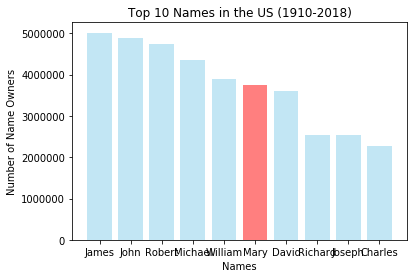

In [22]:
plt.bar(x_values, y_values, color=color, alpha=0.5, align="center")
# Incorporate the other graph properties
plt.title(f"Top {len(top_x)} Names in the US (1910-2018)")
plt.ylabel("Number of Name Owners")
plt.xlabel("Names")


In [23]:
# Start with one review:
#text = top_x

# Create and generate a word cloud image:
#wordcloud = WordCloud().generate(text)

# Display the generated image:
#plt.imshow(wordcloud, interpolation='bilinear')
#plt.axis("off")
#plt.show()

In [24]:
test = [top_x['name'].values[i] for i in range(len(top_x))]
test
abc  = top_x.head(5)
abc

,name,number
0,James,5015584
1,John,4885284
2,Robert,4749154
3,Michael,4366524
4,William,3901134


### Top Names of all time, all states

In [25]:
name_df2 = name_df.groupby(['gender','name']).sum().reset_index()
top_x_gender = name_df2.groupby(['gender'], as_index=False).apply(lambda x: x.nlargest(5, 'number'))
top_x_gender_fin = top_x_gender.reset_index()[top_x_gender.columns[0:6]]
#top_x_gender_fin

### Top Names by Decade by Gender

In [26]:
name_df3 = name_df.groupby(['decades','gender','name']).sum().reset_index()
name_df3
top_x_decade = name_df3.groupby(['decades','gender'], as_index=False).apply(lambda x: x.nlargest(5, 'number'))
top_x_decade_fin = top_x_decade.reset_index()[top_x_decade.columns[0:6]]
#top_x_decade_fin.head()

### Top Name By Decade, By State (F)

In [27]:
female_df = name_df.loc[name_df['gender']=='F',:].groupby(['decades','state','name']).sum().reset_index()
female_df
top_f_decadexstate = female_df.groupby(['decades','state'], as_index=False).apply(lambda x: x.nlargest(1, 'number'))
top_f_decadexstate_fin = top_f_decadexstate.reset_index()[top_f_decadexstate.columns[0:6]]
#top_f_decadexstate

In [28]:
male_df = name_df.loc[name_df['gender']=='M',:].groupby(['decades','state','name']).sum().reset_index()
male_df
top_f_decadexstate = male_df.groupby(['decades','state'], as_index=False).apply(lambda x: x.nlargest(1, 'number'))
top_f_decadexstate_fin = top_f_decadexstate.reset_index()[top_f_decadexstate.columns[0:6]]
#top_f_decadexstate

In [45]:
top_x_gender_fin
top1 = top_x_gender_fin.sort_values('number',ascending=False)
top1


,gender,name,number
5,M,James,4997327
6,M,John,4869607
7,M,Robert,4734038
8,M,Michael,4349307
9,M,William,3890923
0,F,Mary,3741196
1,F,Patricia,1569022
2,F,Elizabeth,1537684
3,F,Jennifer,1466161
4,F,Linda,1447943


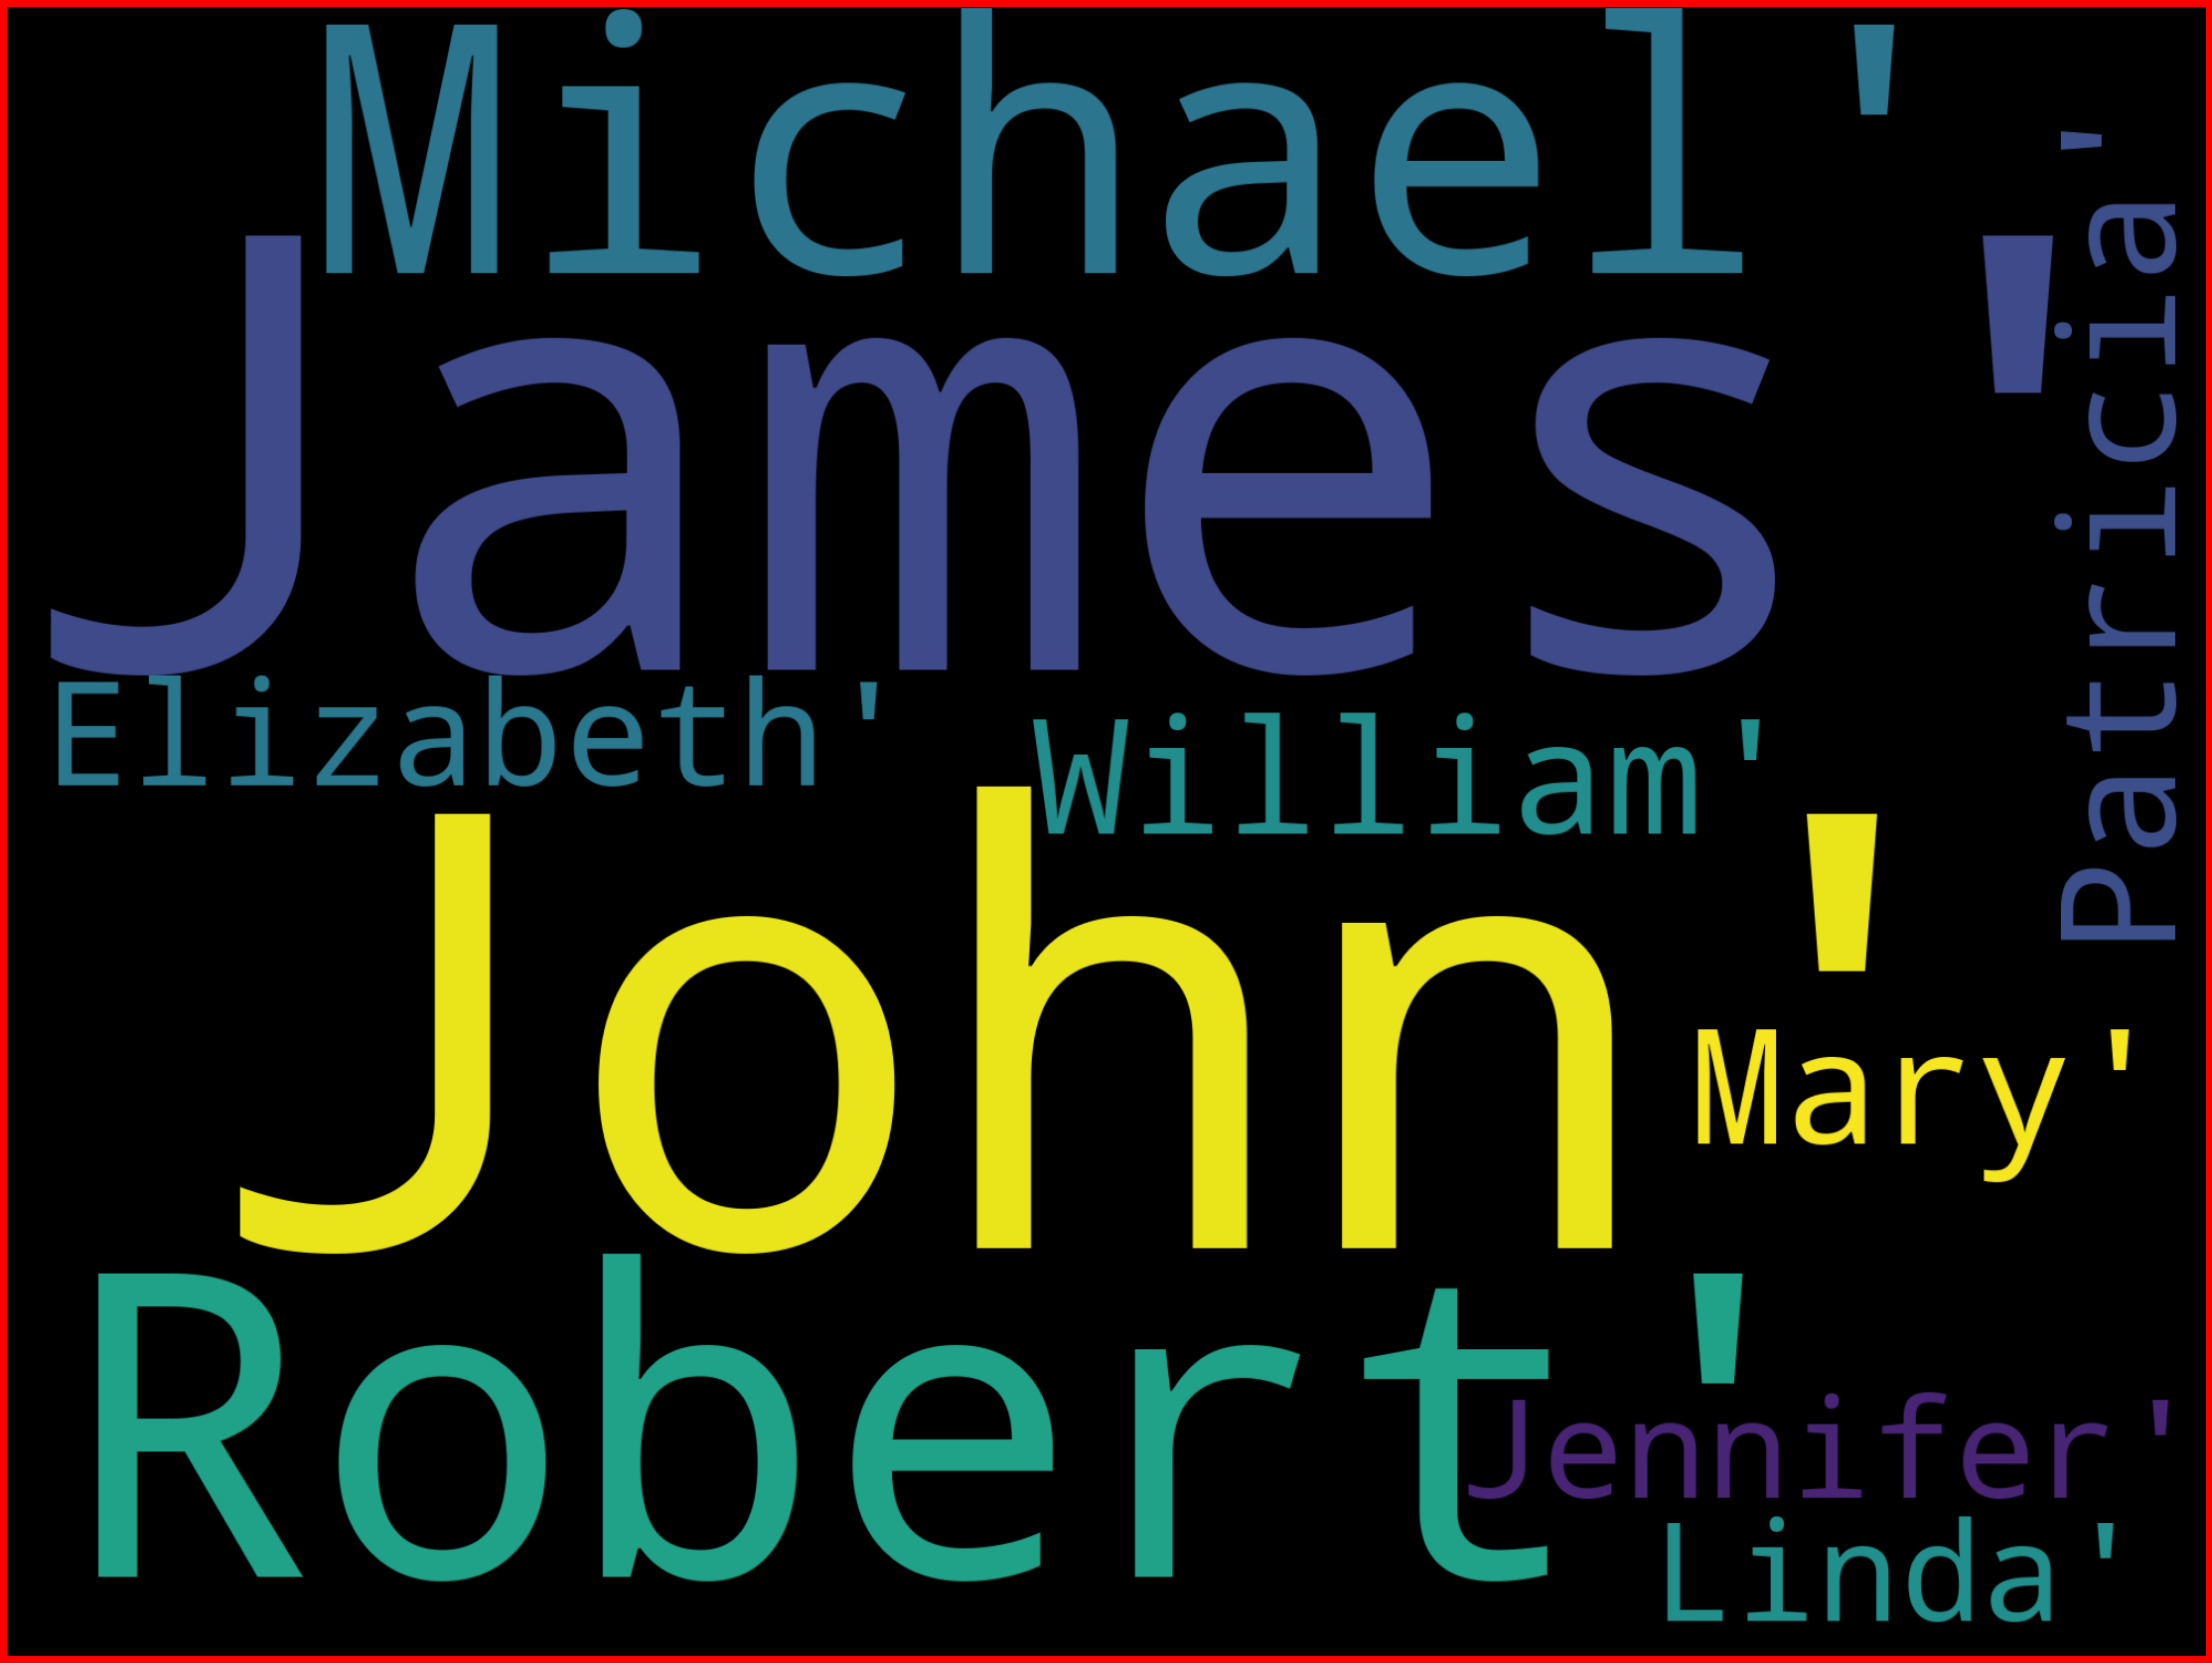

In [59]:
from PIL import Image
#my_mask = np.array(Image.open('../Wikipedia/shape.png'))
text = top1.name.values
wordcloud = WordCloud(
    width = 2000,
    height = 1500,
    background_color = 'black',#mask = my_mask,
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'r',
    edgecolor = 'b')
plt.imshow(wordcloud, interpolation = 'hamming')
plt.axis('off')
plt.tight_layout(pad=25)
plt.show()